In [1203]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1204]:
ATTACK_TARGET = "02"
MAIN = False # True: メインの攻撃, False: 予備選の攻撃

DIR = "../data" if MAIN else "../predata/anonymization_data"

"""
01	宮地研.exe
02	私達日本語本当下手
03	ポップコーン
04	Hots
05	SHA-NES
06	神ぼ大νττ
07	たけのこ映画守り隊
08	0xA
09	ステテコ泥棒
10	動的計画法
11	Gunmataro117
12	HAL
14	privocy
15	ES5 →多数決で陥落？
16	佐古研究室
17	こそっとアタック、しれっとブロック
18	匿名アノニマス
19	RITCHEY
20	KAT-TUNE
21	PR.AVATECT
22	春日部防衛隊（かすかべ防衛隊）
"""

'\n01\t宮地研.exe\n02\t私達日本語本当下手\n03\tポップコーン\n04\tHots\n05\tSHA-NES\n06\t神ぼ大νττ\n07\tたけのこ映画守り隊\n08\t0xA\n09\tステテコ泥棒\n10\t動的計画法\n11\tGunmataro117\n12\tHAL\n14\tprivocy\n15\tES5 →多数決で陥落？\n16\t佐古研究室\n17\tこそっとアタック、しれっとブロック\n18\t匿名アノニマス\n19\tRITCHEY\n20\tKAT-TUNE\n21\tPR.AVATECT\n22\t春日部防衛隊（かすかべ防衛隊）\n'

In [1205]:
# fmt: off
ALL_HEADER = ['Name', 'Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '247', '260', '653', '673', '810', '885',  # noqa: E501
                      '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017',  # noqa: E501
                      '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253',  # noqa: E501
                      '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489',  # noqa: E501
                      '3877', '3889'] # noqa

B_HEADERS_LIST = [
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '1920', '2017', '2087'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

B_USER_ATTRIBUTE_HEADERS = ['Gender', 'Age', 'Occupation', 'ZIP-code']

B_REVIEW_HEADERS_LIST = [
  ['260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['247', '1920', '2017', '2087'],  # noqa: E501
  ['260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

MOVIE_IDS = ['2', '56', '247', '260', '653', '673', '810', '885', '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253', '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489', '3877', '3889']
# fmt: on

### Cデータの読み取り

In [1206]:
from os import listdir

#c0~c9に対するdfのリスト
c_data_list = []

files = listdir(DIR)

for i in range(10):
    file = None
    for f in files:
        if f.startswith(f"C{ATTACK_TARGET}_{i}"):
            file = f
            break
    if file is None:
        print(f)
        raise("File not found")
    c_data = pd.read_csv(f"{DIR}/C{ATTACK_TARGET}_{i}.csv")
    c_data_list.append(c_data)

c_data_list[0]

,Gender,Age,Occupation,ZIP-code,260,653,1525,2105,2193,2253,2628,2872,3438,3439,3440,3877,3889
0,M,1,9,88,5,1,0,0,0,5,5,5,2,0,0,0,0
1,F,25,16,870,2,2,0,1,0,5,3,4,4,1,2,2,0
2,M,45,9,930,1,3,5,3,1,4,4,5,3,0,0,0,0
3,F,25,6,490,4,0,0,0,3,4,1,5,5,0,0,0,0
4,F,35,18,459,2,0,0,3,5,1,2,5,5,4,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,18,5,820,3,0,0,5,4,1,2,0,2,1,4,3,0
9996,F,1,0,329,2,4,0,3,0,5,3,3,5,4,2,4,5
9997,F,18,4,100,1,3,0,3,0,5,4,0,0,0,0,1,0
9998,M,50,15,20,4,0,0,0,2,4,3,1,2,0,5,3,4


### Ba, Bbの読み込み

In [1207]:
Ba = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}a.csv")
Ba.head()

,Name,Gender,Age,Occupation,ZIP-code
0,Arden Elmes,F,50,5,231
1,Nev Faulder,M,1,8,801
2,Byran Raxworthy,M,25,2,750
3,Marnie Sansum,F,35,7,801
4,Trever Yoell,M,56,16,280


In [1208]:
Bb = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}b.csv")
Bb.head()

,2,56,247,260,653,673,810,885,1009,1073,...,2968,3393,3438,3439,3440,3466,3479,3489,3877,3889
0,0,1,0,2,3,0,0,0,0,5,...,0,0,0,0,0,*,0,5,0,0
1,4,4,4,0,3,4,0,3,0,1,...,0,0,2,0,0,0,1,*,0,4
2,4,0,1,4,3,0,0,1,2,5,...,5,1,0,0,0,2,1,4,0,2
3,1,0,0,3,2,1,1,1,0,5,...,0,5,2,1,3,4,0,1,3,0
4,1,0,1,1,0,3,0,1,0,1,...,5,3,2,5,3,2,1,5,2,4


### 攻撃に利用するGAOZと映画のIDの全ペア

In [1209]:
import itertools

cross_tab_pairs = []

pairs_set = set()
for b_review_headers in B_REVIEW_HEADERS_LIST:
    for pair in itertools.combinations(b_review_headers, 2):
        pairs_set.add(pair)

for pair in itertools.combinations(MOVIE_IDS, 2):
    if pair in pairs_set:
        cross_tab_pairs.append(pair)

print(f"ペアの数: {len(cross_tab_pairs)}")
cross_tab_pairs[:5]

ペアの数: 607


[('2', '56'), ('2', '260'), ('2', '653'), ('2', '673'), ('2', '810')]

### C0~C9の各cross集計の平均をとる

In [1210]:
# 1. c0からc9までのデータを結合
combined_data = pd.concat(c_data_list, ignore_index=True)
combined_data.astype("category")
for col in MOVIE_IDS:
    combined_data[col] = pd.Categorical(combined_data[col], categories=[0, 1, 2, 3, 4, 5], ordered=True)


# 2. cross_tab_pairsごとにクロス集計を行う
cross_tabs = {}
for movie_id_i, movie_id_j in cross_tab_pairs:
    cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j], normalize='all')
    cross_tabs[(movie_id_i, movie_id_j)] = cross_tab

cross_tabs[("260", "2174")]

2174,0,1,2,3,4,5
260,,,,,,
0,0.0355,0.0180,0.0267,0.0266,0.0342,0.0237
1,0.0335,0.0174,0.0279,0.0257,0.0323,0.0239
2,0.0373,0.0207,0.0268,0.0309,0.0350,0.0276
3,0.0363,0.0163,0.0274,0.0247,0.0308,0.0268
4,0.0363,0.0158,0.0241,0.0305,0.0322,0.0272
5,0.0357,0.0175,0.0291,0.0282,0.0323,0.0251


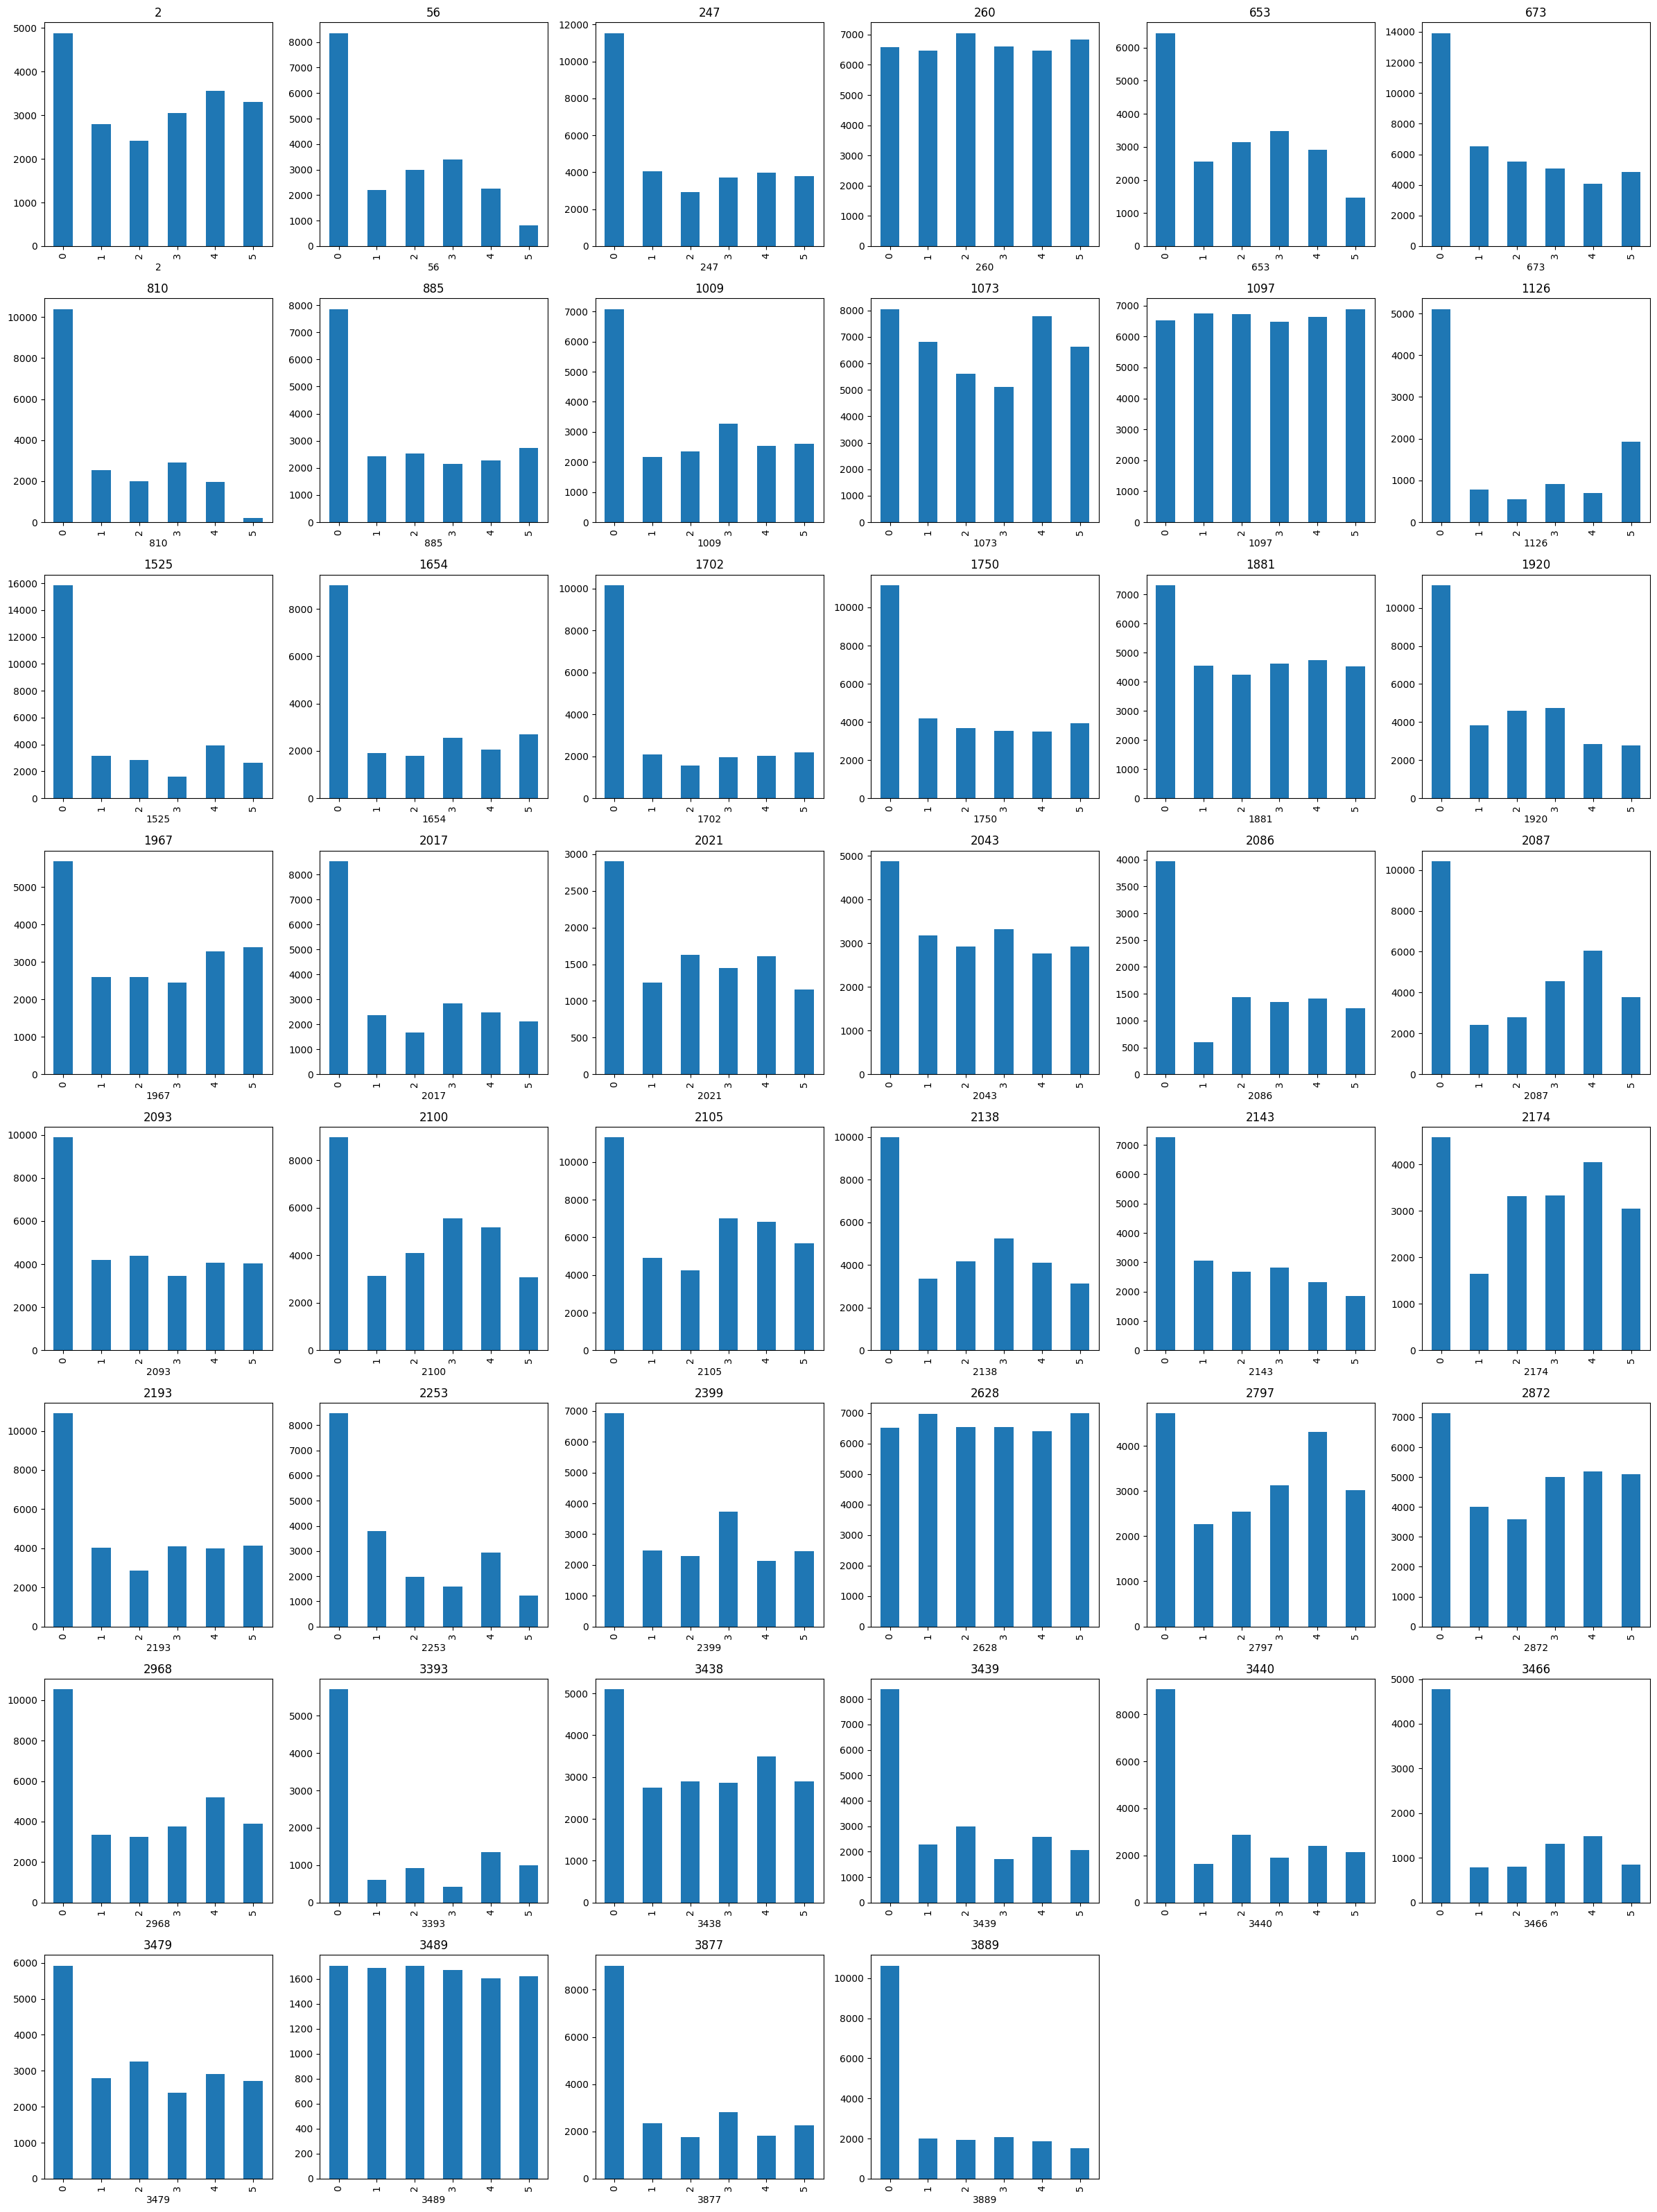

In [1211]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# combined_dataが既に定義されていると仮定します

# カラムの総数を取得
num_cols = len(MOVIE_IDS)
# 列数を6に設定
num_per_row = 6
# 必要な行数を計算
num_rows = int(np.ceil(num_cols / num_per_row))

# サブプロットを作成
fig, axes = plt.subplots(nrows=num_rows, ncols=num_per_row, figsize=(24, num_rows * 4))
axes = axes.flatten()

# # 各カラムに対して棒グラフを描画
for i, col in enumerate(MOVIE_IDS):
    value_counts = combined_data[col].value_counts().sort_index()
    value_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)

# 余ったサブプロットを削除
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### C0~C9の各cross集計の平均の可視化

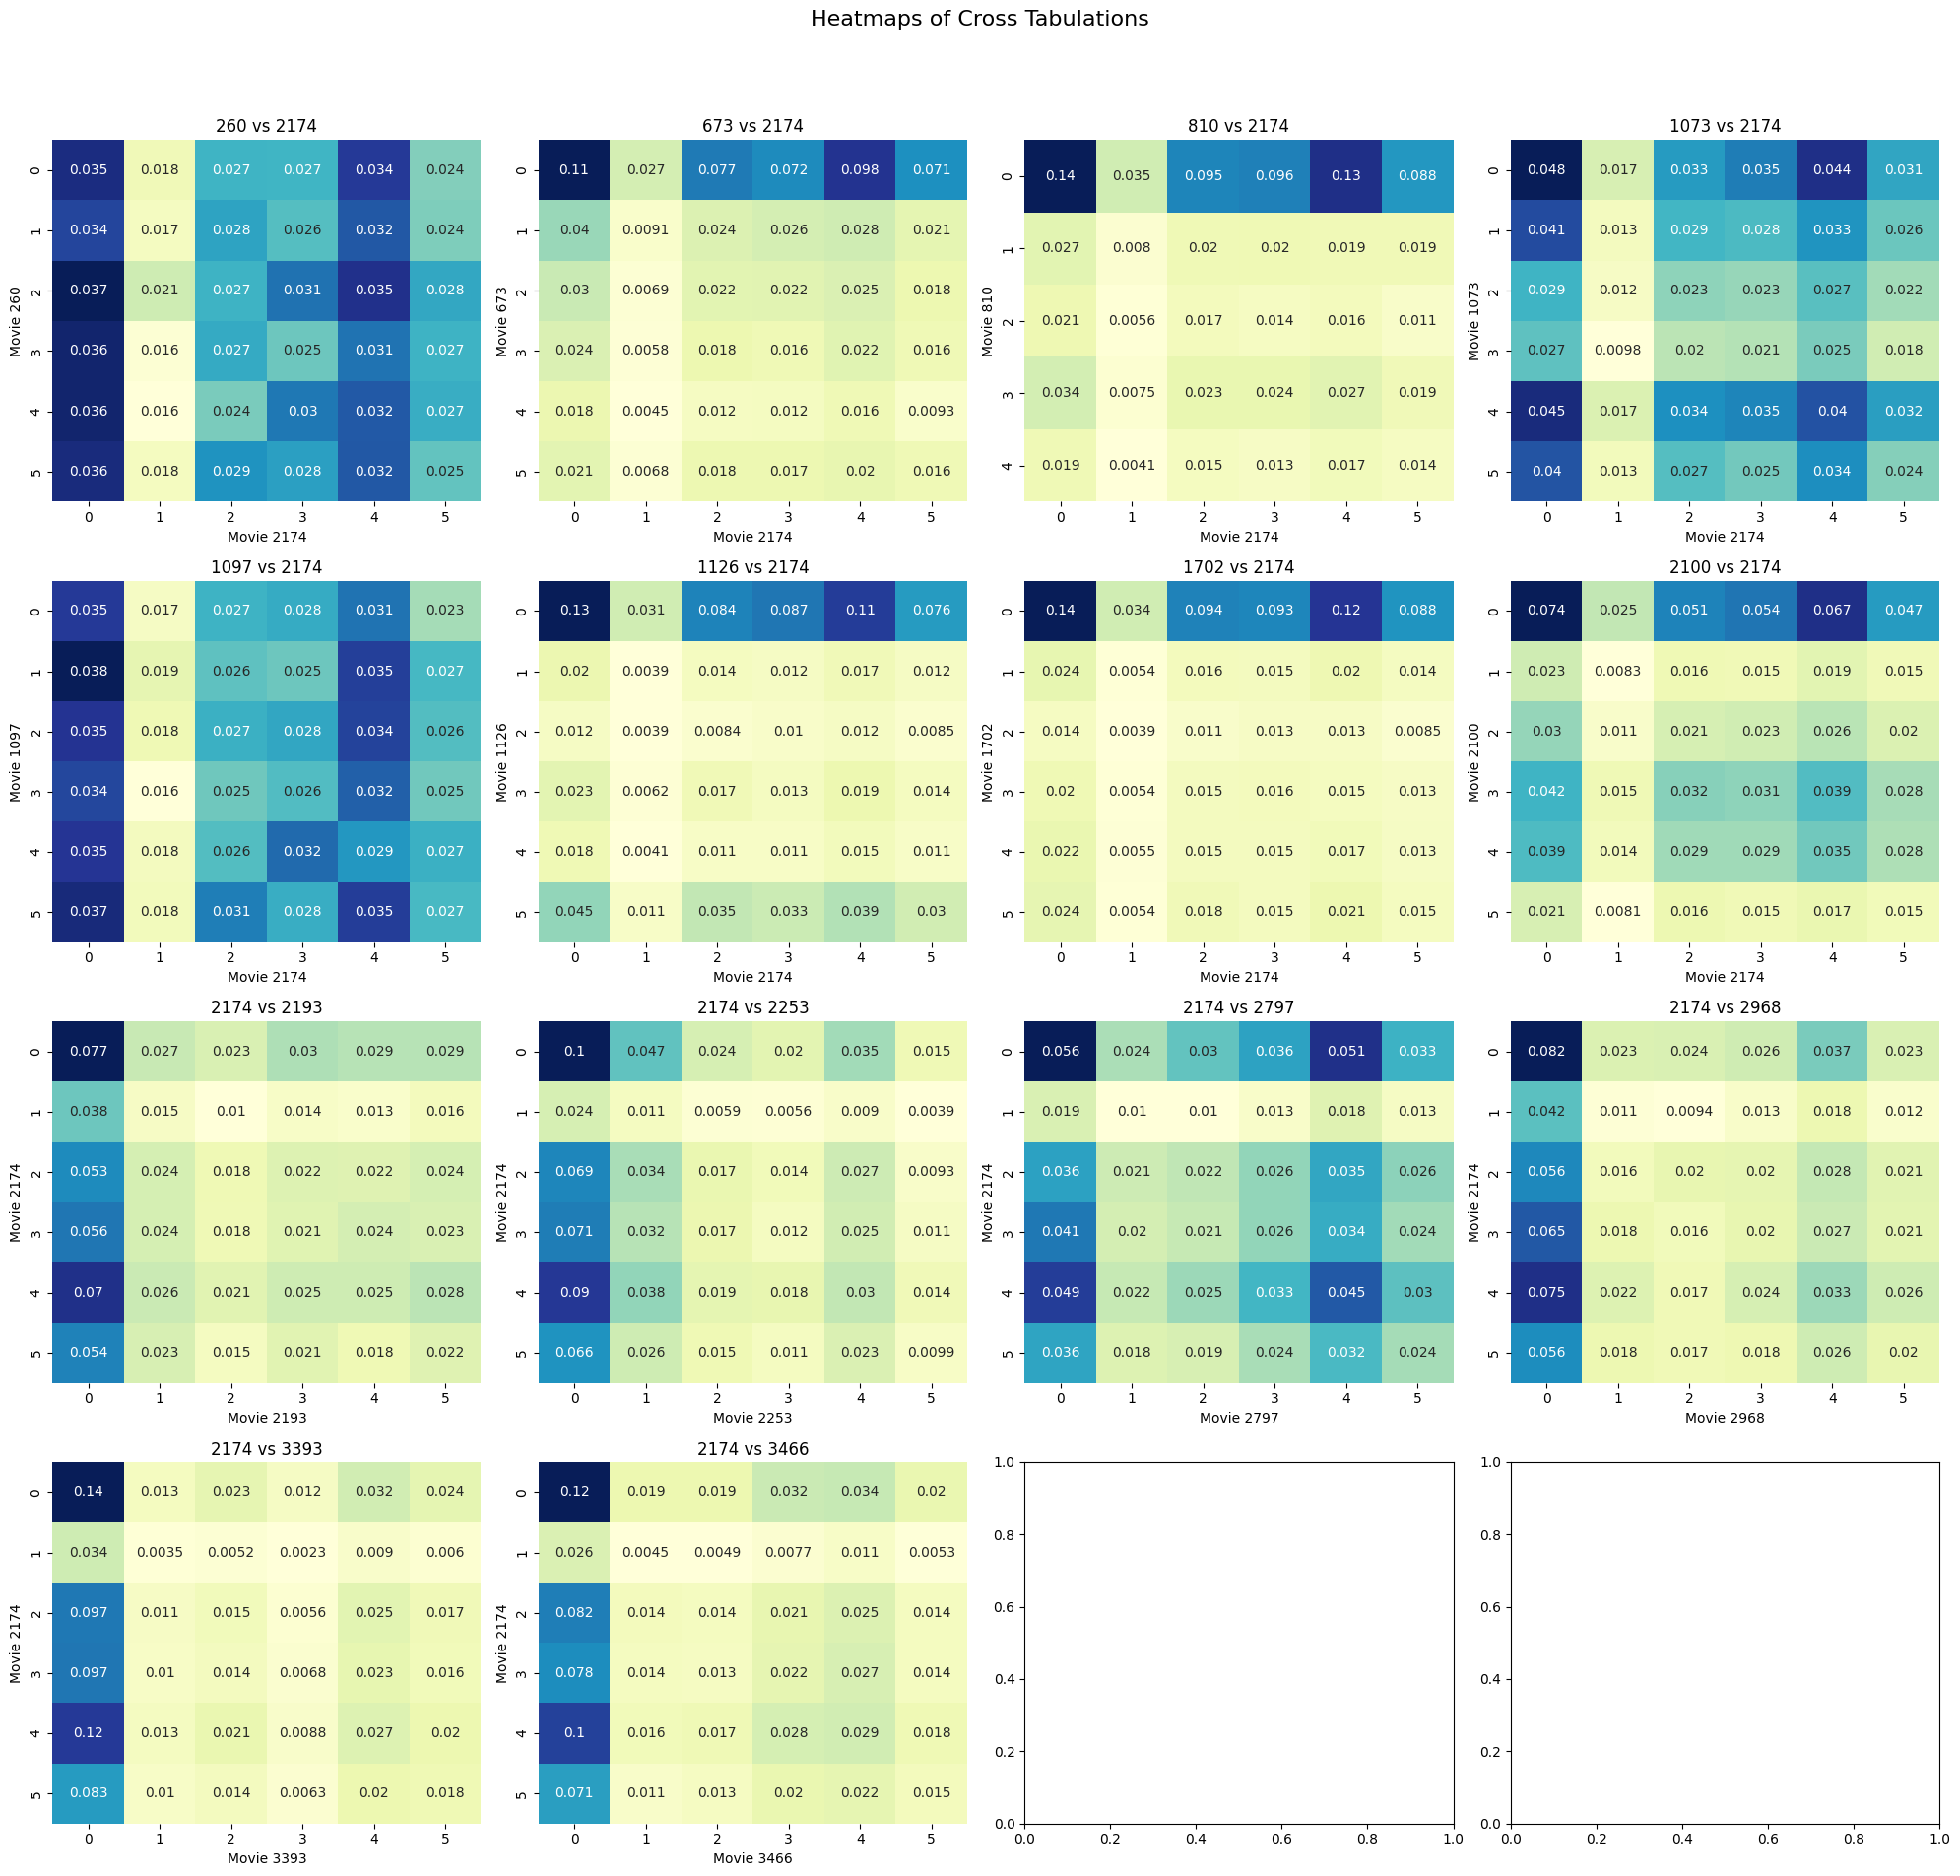

Total number of cross tabulations: 607


In [1212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmaps(cross_tabs, num_plots=12, filter_movie_id=None):
    if filter_movie_id:
        cross_tabs = {k: v for k, v in cross_tabs.items() if filter_movie_id in k}
    num_rows = (num_plots + 3) // 4  # 4列で表示するために必要な行数を計算
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    fig.suptitle("Heatmaps of Cross Tabulations", fontsize=16)
    
    axes = np.array(axes).reshape(-1)  # axes を1次元配列に変換

    for i, ((movie_id_i, movie_id_j), cross_tab) in enumerate(list(cross_tabs.items())[:num_plots]):
        ax = axes[i]
        sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', ax=ax, cbar=False)
        ax.set_title(f"{movie_id_i} vs {movie_id_j}")
        ax.set_ylabel(f"Movie {movie_id_i}")
        ax.set_xlabel(f"Movie {movie_id_j}")

    # 使用していない subplot を削除
    for i in range(num_plots, num_rows * 4):
        fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # suptitle のためのスペースを確保
    plt.show()

# 最初の20個のクロス集計表とそのヒートマップを表示
plot_heatmaps(cross_tabs, num_plots=16, filter_movie_id="2174")

# クロス集計表の数を表示
print(f"Total number of cross tabulations: {len(cross_tabs)}")

### Bbの特定の行の各映画のReviewごとのGAOZの確率の試算

In [1213]:
# Bbの指定した行を取得
target_Bb_row_index = 1
target_Bb_row = Bb.iloc[target_Bb_row_index]
target_Bb_row[:8]

2      4
56     4
247    4
260    0
653    3
673    4
810    0
885    3
Name: 1, dtype: object

In [1214]:
hidden_movie_id = None
for movie_id in MOVIE_IDS:
    if target_Bb_row[movie_id] == "*":
        hidden_movie_id = movie_id
        break
hidden_movie_id

'3489'

In [1215]:
# TODO:　ここの実装が複雑なので後ほど問題ないか確認する
# 各映画IDに対する target_cross を格納するリスト
cross_tabs_with_hidden_movie = []

for movie_id_i, movie_id_j in cross_tab_pairs:
    if hidden_movie_id not in (movie_id_i, movie_id_j):
        continue
    cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
    paired_movie_id = None
    if hidden_movie_id == movie_id_i:
        paired_movie_id = movie_id_j
        # hidden_movie_idを縦の配置に揃えたいので、転置する
        cross_tab = cross_tab.T
    else:
        paired_movie_id = movie_id_i
    # print(cross_tab)
    # 2143       0       1       2       3       4       5
    # 2
    # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
    # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
    # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
    # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
    # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
    # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
    column_sums = cross_tab.sum()
    # 正規化係数を計算（目標値 1/6 を各列の合計で割る）
    normalization_factors = (1/6) / column_sums
    # データフレームの各値に正規化係数を適用
    normalized_cross_tab = cross_tab * normalization_factors
    print(normalized_cross_tab)
    review_value = target_Bb_row[paired_movie_id]
    target_cross_tab = normalized_cross_tab.loc[int(review_value)]
    cross_tabs_with_hidden_movie.append(target_cross_tab)

cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)
cross_tabs_with_hidden_movie

3489         0         1         2         3         4         5
2                                                               
0     0.040715  0.043766  0.038860  0.036583  0.039411  0.042490
1     0.024702  0.022229  0.023042  0.022329  0.023958  0.023045
2     0.018942  0.020846  0.020992  0.020036  0.019913  0.020885
3     0.027631  0.023316  0.024897  0.025718  0.026343  0.024383
4     0.030463  0.028848  0.030658  0.030801  0.028625  0.027160
5     0.024214  0.027663  0.028217  0.031200  0.028417  0.028704
3489         0         1         2         3         4         5
56                                                              
0     0.070201  0.070441  0.072349  0.070375  0.069073  0.067593
1     0.019527  0.017981  0.016012  0.016148  0.016387  0.017490
2     0.026948  0.023810  0.023238  0.024023  0.024476  0.025514
3     0.026655  0.026872  0.027241  0.027512  0.027380  0.029424
4     0.015231  0.017684  0.018746  0.018242  0.018876  0.016564
5     0.008104  0.009879 

,4,4,0,3,4,0,1,0,0,1,...,0,5,0,0,0,1,0,1,0,4
3489,,,,,,,,,,,,,,,,,,,,,
0,0.030463,0.015231,0.027924,0.028022,0.020309,0.059363,0.027045,0.078110,0.061902,0.023921,...,0.058680,0.023921,0.061804,0.050478,0.063269,0.028120,0.055653,0.019723,0.064148,0.019625
1,0.028848,0.017684,0.027366,0.030528,0.019561,0.061450,0.030034,0.077356,0.063723,0.025983,...,0.055424,0.025489,0.060166,0.053646,0.058289,0.030231,0.057202,0.023810,0.063426,0.017487
2,0.030658,0.018746,0.025874,0.028412,0.018746,0.064441,0.028803,0.080844,0.062195,0.026655,...,0.055946,0.022554,0.060340,0.048721,0.059559,0.027924,0.056630,0.024214,0.063952,0.017672
3,0.030801,0.018242,0.029805,0.029007,0.018541,0.060207,0.028708,0.078150,0.062500,0.024621,...,0.055921,0.026715,0.058911,0.053030,0.057117,0.030203,0.057516,0.022329,0.064992,0.017843
4,0.028625,0.018876,0.028832,0.028625,0.019498,0.060153,0.027691,0.081518,0.062124,0.025099,...,0.055694,0.023854,0.059013,0.049990,0.057353,0.027173,0.056005,0.023024,0.066065,0.018357
5,0.027160,0.016564,0.025823,0.028189,0.017181,0.058951,0.029321,0.079630,0.060597,0.026029,...,0.052675,0.025926,0.060391,0.050206,0.058848,0.028086,0.056276,0.023045,0.063477,0.017798


In [1216]:
# 各カラムごとに総和が1になるように確率を正規化
def normalize_columns(df):
    return df.div(df.sum(axis=0), axis=1)

# クロス集計表を列ごとに正規化
normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
normalized_cross_tabs_with_hidden_movie

,4,4,0,3,4,0,1,0,0,1,...,0,5,0,0,0,1,0,1,0,4
3489,,,,,,,,,,,,,,,,,,,,,
0,0.172539,0.144588,0.168600,0.162179,0.178402,0.162833,0.157605,0.164232,0.165939,0.157058,...,0.175510,0.161130,0.171381,0.164924,0.178507,0.163735,0.164032,0.144866,0.166159,0.180407
1,0.163394,0.167873,0.165230,0.176681,0.171838,0.168558,0.175018,0.162647,0.170820,0.170596,...,0.165771,0.171691,0.166838,0.175272,0.164456,0.176031,0.168598,0.174884,0.164291,0.160749
2,0.173645,0.177955,0.156220,0.164440,0.164678,0.176760,0.167847,0.169980,0.166724,0.175007,...,0.167333,0.151922,0.167320,0.159182,0.168039,0.162598,0.166910,0.177856,0.165654,0.162456
3,0.174457,0.173164,0.179953,0.167882,0.162872,0.165148,0.167294,0.164316,0.167542,0.161655,...,0.167258,0.179946,0.163359,0.173262,0.161150,0.175869,0.169523,0.164006,0.168347,0.164024
4,0.162129,0.179183,0.174082,0.165669,0.171282,0.165000,0.161369,0.171398,0.166534,0.164788,...,0.166579,0.160677,0.163640,0.163327,0.161816,0.158223,0.165069,0.169117,0.171126,0.168751
5,0.153835,0.157236,0.155914,0.163148,0.150928,0.161701,0.170866,0.167427,0.162440,0.170896,...,0.157549,0.174634,0.167462,0.164033,0.166033,0.163543,0.165867,0.169271,0.164423,0.163614


In [1217]:
# # TODO: ここがSUMでいいのかは要検討
hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.mean(axis=1)
hidden_movie_probabilities


3489
0    0.165322
1    0.168814
2    0.167008
3    0.169211
4    0.165988
5    0.163657
dtype: float64

In [1218]:
hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
hidden_movie_histgram

3489
0    0.1707
1    0.1687
2    0.1707
3    0.1672
4    0.1607
5    0.1620
Name: proportion, dtype: float64

In [1219]:
probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
probability

3489
4    1.032906
3    1.012025
5    1.010231
1    1.000678
2    0.978370
0    0.968495
dtype: float64

In [1220]:
probability.index[0]

4

## 正規のMAE ATTACK

In [1221]:
# target_Bb_row_index = 0

result_list = []

for target_Bb_row_index in range(50):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    # TODO:　ここの実装が複雑なので後ほど問題ないか確認する
    # 各映画IDに対する target_cross を格納するリスト
    cross_tabs_with_hidden_movie = []

    for movie_id_i, movie_id_j in cross_tab_pairs:
        if hidden_movie_id not in (movie_id_i, movie_id_j):
            continue
        cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
        paired_movie_id = None
        if hidden_movie_id == movie_id_i:
            paired_movie_id = movie_id_j
            # 転置する
            cross_tab = cross_tab.T
        else:
            paired_movie_id = movie_id_i
        # 2143       0       1       2       3       4       5
        # 2                                                   
        # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
        # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
        # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
        # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
        # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
        # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
        review_value = target_Bb_row[paired_movie_id]

        column_sums = cross_tab.sum()
        # 正規化係数を計算（目標値 1/6 を各列の合計で割る）
        normalization_factors = (1/6) / column_sums
        # データフレームの各値に正規化係数を適用
        normalized_cross_tab = cross_tab * normalization_factors
        # print(cross_tab)
        # print(review_value)
        target_cross_tab = normalized_cross_tab.loc[int(review_value)]
        # print(target_cross_tab)
        cross_tabs_with_hidden_movie.append(target_cross_tab)

    cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)

    # 各カラムごとに総和が1になるように確率を正規化
    def normalize_columns(df):
        return df.div(df.sum(axis=0), axis=1)

    # クロス集計表を列ごとに正規化
    normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
    normalized_cross_tabs_with_hidden_movie

    # hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.sum(axis=1)
    # hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
    # probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
    hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.mean(axis=1)
    # hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
    # probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
    result_list.append(hidden_movie_probabilities.sort_values(ascending=False).index[0])

result_list = pd.Series(result_list).values
result_list

array([0, 3, 0, 1, 3, 2, 0, 0, 0, 0, 0, 1, 1, 1, 5, 1, 0, 3, 4, 3, 4, 0,
       4, 2, 0, 0, 0, 1, 0, 2, 0, 5, 0, 3, 5, 0, 5, 0, 1, 3, 2, 1, 5, 0,
       3, 0, 0, 1, 0, 1])

In [1222]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(result_list)

if not MAIN:
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[2 2 2 2 5 4 0 2 0 0 0 3 3 0 1 5 1 2 4 0 2 0 0 0 2 2 0 4 0 5 0 5 0 0 5 0 4
 0 3 0 0 0 0 0 2 0 0 3 4 1]
[0, 3, 0, 1, 3, 2, 0, 0, 0, 0, 0, 1, 1, 1, 5, 1, 0, 3, 4, 3, 4, 0, 4, 2, 0, 0, 0, 1, 0, 2, 0, 5, 0, 3, 5, 0, 5, 0, 1, 3, 2, 1, 5, 0, 3, 0, 0, 1, 0, 1]


マッチングの成功率: <span style='color:yellow'>18</span> / 50

In [1223]:
count_0 = my_answer.count(0)

printmd(f"0の数: <span style='color:green'>{count_0}</span>")
if count_0 >= 30:
    printmd(f"🚨 <span style='color:yellow'>0が30以上です</span>")

0の数: <span style='color:green'>21</span>

## MAE ATTACK + ゴミ方式

In [1224]:
MAX_0_COUNT = 28

answer_df = pd.DataFrame(index=range(50), columns=["Answer", "0_Prob", "NoCondition0", "MaxOther0"])

prob_0 = []
max_other_0 = []

for target_Bb_row_index in range(50):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    # TODO:　ここの実装が複雑なので後ほど問題ないか確認する
    # 各映画IDに対する target_cross を格納するリスト
    cross_tabs_with_hidden_movie = []

    for movie_id_i, movie_id_j in cross_tab_pairs:
        if hidden_movie_id not in (movie_id_i, movie_id_j):
            continue
        cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
        paired_movie_id = None
        if hidden_movie_id == movie_id_i:
            paired_movie_id = movie_id_j
            # 転置する
            cross_tab = cross_tab.T
        else:
            paired_movie_id = movie_id_i
        # 2143       0       1       2       3       4       5
        # 2                                                   
        # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
        # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
        # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
        # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
        # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
        # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
        review_value = target_Bb_row[paired_movie_id]

        column_sums = cross_tab.sum()
        # 正規化係数を計算（目標値 1/6 を各列の合計で割る）
        normalization_factors = (1/6) / column_sums
        # データフレームの各値に正規化係数を適用
        normalized_cross_tab = cross_tab * normalization_factors
        # print(cross_tab)
        # print(review_value)
        target_cross_tab = normalized_cross_tab.loc[int(review_value)]
        # print(target_cross_tab)
        cross_tabs_with_hidden_movie.append(target_cross_tab)

    cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)

    # 各カラムごとに総和が1になるように確率を正規化
    def normalize_columns(df):
        return df.div(df.sum(axis=0), axis=1)

    # クロス集計表を列ごとに正規化
    normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
    normalized_cross_tabs_with_hidden_movie

    hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.mean(axis=1)

    prob_0.append(hidden_movie_probabilities[0])

    max_other_index = hidden_movie_probabilities.iloc[1:].idxmax()
    max_other_0.append(max_other_index)

answer_df["0_Prob"] = prob_0
answer_df["MaxOther0"] = max_other_0
# 0_Probの上位MAX_0_COUNTを求める
top_0_probs = answer_df.nlargest(MAX_0_COUNT, "0_Prob")
# NoCondition0を設定
answer_df["NoCondition0"] = False
answer_df.loc[top_0_probs.index, "NoCondition0"] = True

# Answerを決定
answer_df["Answer"] = np.where(answer_df["NoCondition0"], 0, answer_df["MaxOther0"])


result_list = answer_df["Answer"].values
result_list

array([0, 3, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 1, 0, 5, 1, 0, 3, 4, 0, 4, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 5, 0, 0, 5, 0, 5, 0, 1, 3, 0, 1, 5, 0,
       3, 0, 0, 1, 0, 1])

In [1225]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(result_list)

if not MAIN:
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[2 2 2 2 5 4 0 2 0 0 0 3 3 0 1 5 1 2 4 0 2 0 0 0 2 2 0 4 0 5 0 5 0 0 5 0 4
 0 3 0 0 0 0 0 2 0 0 3 4 1]
[0, 3, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 1, 0, 5, 1, 0, 3, 4, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 5, 0, 0, 5, 0, 5, 0, 1, 3, 0, 1, 5, 0, 3, 0, 0, 1, 0, 1]


マッチングの成功率: <span style='color:yellow'>24</span> / 50

In [1226]:
count_0 = my_answer.count(0)

printmd(f"0の数: <span style='color:green'>{count_0}</span>")
if count_0 >= 30:
    printmd(f"🚨 <span style='color:yellow'>0が30以上です</span>")

0の数: <span style='color:green'>28</span>

In [1227]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
import random

def printmd(string):
    display(Markdown(string))

my_answer = []
for _ in range(28):
    my_answer.append(0)
for _ in range(22):
    my_answer.append(random.choice([1, 2, 3, 4, 5]))

np.random.shuffle(my_answer)

if not MAIN:
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[2 2 2 2 5 4 0 2 0 0 0 3 3 0 1 5 1 2 4 0 2 0 0 0 2 2 0 4 0 5 0 5 0 0 5 0 4
 0 3 0 0 0 0 0 2 0 0 3 4 1]
[5, 3, 5, 3, 4, 0, 4, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 4, 0, 0, 0, 5, 3, 5, 0, 0, 2, 0, 3, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0]


マッチングの成功率: <span style='color:yellow'>13</span> / 50